In [2]:
from bs4 import BeautifulSoup
import os
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import math
import re
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
!pip install talib-binary

     |████████████████████████████████| 2.4 MB 5.4 MB/s 


In [ ]:
import talib as tb

In [ ]:
pip install transformers

     |████████████████████████████████| 4.0 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 41.3 MB/s 
     |████████████████████████████████| 6.6 MB 21.3 MB/s 
     |████████████████████████████████| 895 kB 41.8 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # Progress Bar
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import transformers
# from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig
# import tensorflow as tf
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# import warnings
# from transformers import logging as hf_logging
# #hf_logging.set_verbosity_error() # Hidding Huggingface Warnings
# warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ir_project/data/News_data.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,_id,Date,Title,Article,Link
0,0c527fa7eb018291956dee960b525e5a,2010-01-01T00:09:00+05:30,Companies adopt wierd names to catch consumer ...,NEW DELHI/BANGALORE: In New Delhi’s posh South...,https://economictimes.indiatimes.com/industry/...
1,b4ef0747e88a8d93989041e053e6341b,2010-01-01T00:12:00+05:30,3 Idiots set to be Bollywood’s biggest grosser,NEW DELHI: Three idiots is on its way to becom...,https://economictimes.indiatimes.com/industry/...
2,495032c67bf9e53dfbf5352154e78471,2010-01-01T00:18:00+05:30,Bharti bags Bangladesh’s Warid for bargain pri...,India’s largest telecom company Bharti Airtel ...,https://economictimes.indiatimes.com/industry/...
3,ae0f4e9d7d5e46cfcc28817b06cf3ce7,2010-01-01T00:27:00+05:30,Corporate air travel takes off once again,"MUMBAI: As global economy improves, corporate ...",https://economictimes.indiatimes.com/news/comp...
4,1a4fbde9cf9bc08c0b4280f36efc7127,2010-01-01T00:30:00+05:30,Global mediclaim policy awaits jet-setting exe...,MUMBAI: Globe trotting executives will no long...,https://economictimes.indiatimes.com/news/comp...


In [5]:
df.tail()

,_id,Date,Title,Article,Link
6319405,0ce4dd0b2011e25bab180bd0abdb593b,2011-01-03T15:01:56+05:30,Reliance Cap buys 26% Indiabulls stake in ICEX,"Reliance Capital, the financial arm of Relianc...",https://www.moneycontrol.com/news/business/com...
6319406,983f3cc688b9f6769ac720115fe0f30c,2011-01-03T14:54:37+05:30,Tata Motors extends open sales of Nano across ...,Tata Motors today announced open sales of the ...,https://www.moneycontrol.com/news/business/com...
6319407,9150ec492c982894b25543941782b623,2011-01-03T14:04:30+05:30,Larsen &amp;amp; Toubro bags order worth Rs 11...,Larsen &amp;amp; Toubro Ltd has informed BSE r...,https://www.moneycontrol.com/news/business/com...
6319408,f52aa3b0eca7e63b9d97fc5d6245de1f,2011-01-03T13:11:02+05:30,State Bank of India revises base rate to 8.00%...,State Bank of India has informed BSE that the ...,https://www.moneycontrol.com/news/business/com...
6319409,d9e3b942e0ac90e92a3950692586a074,2011-01-03T12:50:56+05:30,Lupin settles all ongoing litigation with Suno...,Lupin Ltd has informed BSE regarding a Press R...,https://www.moneycontrol.com/news/business/com...


In [ ]:
len(df)

6319410

In [ ]:
# Filter out and keep only necessary data i.e. financial news data 
regex1='https://economictimes.indiatimes.com/news/economy/.*'
regex8='https://economictimes.indiatimes.com/news/company/.*'
regex2='https://economictimes.indiatimes.com/industry/telecom/.*'
regex3='https://economictimes.indiatimes.com/industry/energy/.*'
regex4='https://economictimes.indiatimes.com/markets/stocks/.*'
regex5='https://economictimes.indiatimes.com/markets/commodities/.*'
regex6='https://economictimes.indiatimes.com/wealth/invest/.*'
regex7='https://economictimes.indiatimes.com/tech/software/.*'
regex9='https://economictimes.indiatimes.com/industry/indl-goods/.*'
financial_df=df[df['Link'].str.match(regex1)|
                              df['Link'].str.match(regex2)|df['Link'].str.match(regex3)|
          df['Link'].str.match(regex4)|df['Link'].str.match(regex5)|df['Link'].str.match(regex6)|
          df['Link'].str.match(regex7)|df['Link'].str.match(regex8)|df['Link'].str.match(regex9)]

In [ ]:
len(financial_df)

379162

In [ ]:
financial_df['Date']=pd.to_datetime(financial_df['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
financial_d_groupedf=financial_df.groupby(pd.Grouper(key='Date', axis=0, 
                      freq='M'))

In [ ]:
financial_df.isna().sum()

_id        0
Date       0
Title      0
Article    0
Link       0
dtype: int64

In [ ]:
# Create headlines list having all values of title column stored as list in it 
headlines=list(financial_df['Title'])
headlines_list = [i.strip("[]").split(", ") for i in headlines]

In [ ]:
class PreProcessing():
    def __init__(self, docs):
        self.docs = docs

    def text_cleaning(self):
        new=[]
        for text in self.docs:
            for i in text:
                x = re.sub("[^a-zA-Z]", " ", i)                  
                new.append(re.sub(' +', ' ', x))                    
        return new

    def remove_stopwords(self):
        without_sw=[]
        clean_text=self.text_cleaning()
        for strings in clean_text:                            
            tokens = nltk.word_tokenize(strings)
            stop_words = set(stopwords.words('english'))
            tokens_without_sw = [word for word in tokens if not word.lower() in stop_words]   
            without_sw.append(tokens_without_sw)
        return without_sw

    def stemming(self):
        ps = PorterStemmer()
        stemmed=[]
        lst=self.remove_stopwords()                            
        for strings in lst:
            s=[]
            for i in strings:
                rootWord=ps.stem(i)
                s.append(rootWord)
            stemmed.append(s)
        return stemmed

In [ ]:
pre_process=PreProcessing(headlines_list)
pre_processed_headlines=pre_process.stemming()

In [ ]:
pre_processed_headlines

In [ ]:
#save pre processed headlines for future use
with open('/content/drive/MyDrive/ir_project/binaries/pre_processed_headlines', 'wb') as fileobj:
  pickle.dump(financial_df, fileobj)

NameError: ignored

In [ ]:
#get labelled data
with open('/content/drive/MyDrive/ir_project/binaries/pre_processed_headlines', 'rb') as fileobj:
  financial_df= pickle.load(fileobj)

In [ ]:
df_nifty = pd.read_csv('/content/drive/MyDrive/ir_project/data/NIFTY_50.csv')
df_nifty.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,04-Jan-2010,5200.90,5238.45,5167.10,5232.20,148652424,6531.61
1,1,05-Jan-2010,5277.15,5288.35,5242.40,5277.90,240844424,7969.62
2,2,06-Jan-2010,5278.15,5310.85,5260.05,5281.80,216147837,7892.60
3,3,07-Jan-2010,5281.80,5302.55,5244.75,5263.10,181246734,6890.99
4,4,08-Jan-2010,5264.25,5276.75,5234.70,5244.75,201910800,7777.04


In [ ]:
df_nifty['Date']=pd.to_datetime(df_nifty['Date'])

In [ ]:
df['Stocastic Oscilator']=tf.s

In [ ]:
print(df_nifty['Open'][2975])
print(df_nifty.index)

17220.1
RangeIndex(start=0, stop=2978, step=1)


In [ ]:
financial_df['Date']=financial_df['Date'].apply(lambda x:x.tz_localize(None)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
financial_df['Sentiment']=''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final=pd.DataFrame()

In [ ]:
sentiment=''
for ind in range(len(df_nifty)-1):
  pc=df_nifty['Close'][ind+1]-df_nifty['Close'][ind]
  #pc=(c/df_nifty['Close'][ind])*100
  if(pc>0):
    sentiment="Positive"
  else:
    sentiment="Negative"
  # elif(pc>-.5):
  #   sentiment="Neutral"
  # elif(pc>-1.5):
  #   sentiment="Negative"
  # else:
  #   sentiment="Extreme Negative"
  df_temp = financial_df[(financial_df['Date'] < df_nifty['Date'][ind+1]) & (financial_df['Date'] >= df_nifty['Date'][ind])]
  df_temp['Sentiment']=sentiment
  df_final=pd.concat([df_final,df_temp],axis=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
df_final.tail()

In [ ]:
#save labelled data
with open('/content/drive/MyDrive/ir_project/binaries/labelled_news_binary_test', 'wb') as fileobj:
  pickle.dump(df_final, fileobj)

In [ ]:
temp=np.array(df_final['Sentiment'])

In [ ]:
unique, counts = np.unique(temp, return_counts=True)
dict(zip(unique, counts))

{'Negative': 175845, 'Positive': 203254}

In [ ]:
#get labelled data
with open('/content/drive/MyDrive/ir_project/binaries/labelled_news', 'rb') as fileobj:
  df_labelled= pickle.load(fileobj)

In [ ]:
#get labelled data
with open('/content/drive/MyDrive/ir_project/binaries/stock_data_with_indicators', 'rb') as fileobj:
  df_technical_indicators= pickle.load(fileobj)


In [ ]:
df_technical_indicators

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Sochastic oscillator index,William index,Relative Strength Index
0,0,2010-01-04,5200.90,5238.45,5167.10,5232.20,148652424,6531.61,0.000000,0.000000,0.000000
1,1,2010-01-05,5277.15,5288.35,5242.40,5277.90,240844424,7969.62,0.000000,0.000000,100.000000
2,2,2010-01-06,5278.15,5310.85,5260.05,5281.80,216147837,7892.60,0.000000,0.000000,100.000000
3,3,2010-01-07,5281.80,5302.55,5244.75,5263.10,181246734,6890.99,0.000000,0.000000,92.725757
4,4,2010-01-08,5264.25,5276.75,5234.70,5244.75,201910800,7777.04,0.000000,0.000000,85.597397
...,...,...,...,...,...,...,...,...,...,...,...
2973,243,2021-12-27,16937.75,17112.05,16833.20,17086.25,144777457,12567.03,76.136044,-23.863956,50.045939
2974,244,2021-12-28,17177.60,17250.25,17161.15,17233.25,176026100,14553.76,97.976311,-2.023689,57.402618
2975,245,2021-12-29,17220.10,17285.95,17176.65,17213.60,161679423,14320.79,87.895265,-12.104735,56.113855
2976,246,2021-12-30,17201.45,17264.05,17146.35,17203.95,320831676,21929.19,82.420409,-17.579591,55.401212


#Sentiment Ananlsis using CNN

In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
#import all library : 
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from google.colab.patches import cv2_imshow
from PIL import Image,ImageOps
import PIL
from skimage.util import random_noise
import sys
import os
from gensim.models import Word2Vec

In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/pre_processed_headlines', 'wb') as fileobj:
  pickle.dump(pre_processed_headlines, fileobj)

In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/pre_processed_headlines', 'rb') as fileobj:
  pre_processed_headlines= pickle.load(fileobj)


NameError: ignored

In [ ]:
len(pre_processed_headlines)

In [ ]:
news_headlines=[]
for i in range(len(pre_processed_headlines)):
  str1=' '.join([str(elem) for elem in pre_processed_headlines[i]])
  news_headlines.append(str1)

In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/labelled_news', 'rb') as fileobj:
  labelled_news= pickle.load(fileobj)


In [ ]:
labelled_news_list=[]
labelled_news_list=labelled_news['Article']

NameError: ignored

In [ ]:
word2vec_model = Word2Vec(sentences=labelled_news_list, vector_size=20, window=5, min_count=1, workers=4, sg=1)

In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/word2vec_model', 'wb') as fileobj:
  pickle.dump(word2vec_model, fileobj)

In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/word2vec_model', 'rb') as fileobj:
  word2vec_model= pickle.load(fileobj)


In [ ]:
def gen_embedding(lst):
  result = []
  for sentence in lst:
    vector = np.zeros((20,))
    words = sentence.split()
    count = 0
    for word in words:
      try:
        vector += word2vec_model.wv.get_vector(word)
        count += 1
      except:
        pass
    
    if count > 0:
      result.append(vector/count)
    else:
      result.append(vector)
  return result

In [ ]:
news_headlines = gen_embedding(labelled_news_list)

In [ ]:
news_headlines

In [ ]:
labelled_news.head()

,_id,Date,Title,Article,Link,Sentiment
197,7ead28fb9f37e2bfd45f14be4fcc1a96,2010-01-04 00:35:00,Steel sales jump 50% in Dec on firm demand,NEW DELHI: India’s top steelmakers led by Stee...,https://economictimes.indiatimes.com/industry/...,Positive
198,4ade1816abd1a174e77c33613c2dbb22,2010-01-04 00:40:00,Petrobras to exit ONGC’s gas block,NEW DELHI: Brazil’s Petrobras had decided to q...,https://economictimes.indiatimes.com/industry/...,Positive
199,5c6bb6fcfe3aa6a411881c960515b49c,2010-01-04 00:42:00,PE entry to help Himadri fund expansion,MUMBAI: Private equity Bain Capital has bought...,https://economictimes.indiatimes.com/markets/s...,Positive
200,ecc15c4a58383b385578927646a1ca74,2010-01-04 00:46:00,India Inc’s top bosses help themselves with Es...,NEW DELHI: The three months leading to Decembe...,https://economictimes.indiatimes.com/markets/s...,Positive
202,1aab1cae901738671d5b3d3b0b194c60,2010-01-04 00:48:00,Infosys results may not make an impact on open...,MUMBAI: It’s a tradition that has been followe...,https://economictimes.indiatimes.com/markets/s...,Positive


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labelled_news['Sentiment'])

In [ ]:
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)


In [ ]:
onehot_encoded[1000]

array([0., 0., 1., 0., 0.])

In [ ]:
labelled_news["Sentiment"] = labelled_news["Sentiment"].astype('category')

In [ ]:
labelled_news["Sentiment_encoded"] = labelled_news["Sentiment"].cat.codes

In [ ]:
y=[]
y=labelled_news['Sentiment_encoded']

In [ ]:
x=np.array(news_headlines)

In [ ]:
x.shape

(379099, 20)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#model.fit(X_train,y_train,epochs=15)
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=64,
    validation_data = (X_test,y_test)
)

Epoch 1/10
3555/3555 [==============================] - 52s 14ms/step - loss: 1.4058 - accuracy: 0.4294 - val_loss: 1.4026 - val_accuracy: 0.4282
Epoch 2/10
3555/3555 [==============================] - 50s 14ms/step - loss: 1.4031 - accuracy: 0.4294 - val_loss: 1.4025 - val_accuracy: 0.4282
Epoch 3/10
3555/3555 [==============================] - 49s 14ms/step - loss: 1.4027 - accuracy: 0.4294 - val_loss: 1.4029 - val_accuracy: 0.4282
Epoch 4/10
3555/3555 [==============================] - 51s 14ms/step - loss: 1.4025 - accuracy: 0.4294 - val_loss: 1.4026 - val_accuracy: 0.4282
Epoch 5/10
3555/3555 [==============================] - 49s 14ms/step - loss: 1.4026 - accuracy: 0.4294 - val_loss: 1.4026 - val_accuracy: 0.4282
Epoch 6/10
3555/3555 [==============================] - 49s 14ms/step - loss: 1.4024 - accuracy: 0.4294 - val_loss: 1.4025 - val_accuracy: 0.4282
Epoch 7/10
3555/3555 [==============================] - 50s 14ms/step - loss: 1.4023 - accuracy: 0.4294 - val_loss: 1.4026 -

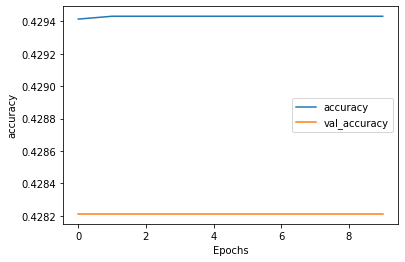

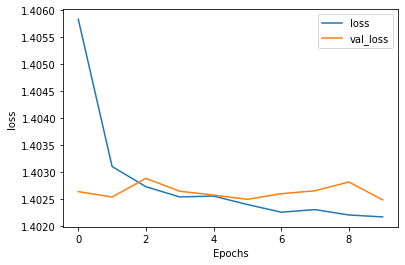

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'accuracy')
plot_history(history,'loss')

#CNN and Word2Vec for Sentiment Analysis

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 5.6 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing
import datetime

In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    stops = stopwords.words('english')
    #print(stops)
    porter = PorterStemmer()
    for word in sentence.split():
        if word in stops:
            sentence = sentence.replace(word, '')
        sentence = sentence.replace(word, porter.stem(word))
    return sentence.lower()

In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/labelled_news_binary_new', 'rb') as fileobj:
  labelled_news= pickle.load(fileobj)


In [ ]:
labelled_news=df_final

In [ ]:
labelled_news.head(10)

,_id,Date,Title,Article,Link,Sentiment
197,7ead28fb9f37e2bfd45f14be4fcc1a96,2010-01-04 00:35:00,Steel sales jump 50% in Dec on firm demand,NEW DELHI: India’s top steelmakers led by Stee...,https://economictimes.indiatimes.com/industry/...,Positive
198,4ade1816abd1a174e77c33613c2dbb22,2010-01-04 00:40:00,Petrobras to exit ONGC’s gas block,NEW DELHI: Brazil’s Petrobras had decided to q...,https://economictimes.indiatimes.com/industry/...,Positive
199,5c6bb6fcfe3aa6a411881c960515b49c,2010-01-04 00:42:00,PE entry to help Himadri fund expansion,MUMBAI: Private equity Bain Capital has bought...,https://economictimes.indiatimes.com/markets/s...,Positive
200,ecc15c4a58383b385578927646a1ca74,2010-01-04 00:46:00,India Inc’s top bosses help themselves with Es...,NEW DELHI: The three months leading to Decembe...,https://economictimes.indiatimes.com/markets/s...,Positive
202,1aab1cae901738671d5b3d3b0b194c60,2010-01-04 00:48:00,Infosys results may not make an impact on open...,MUMBAI: It’s a tradition that has been followe...,https://economictimes.indiatimes.com/markets/s...,Positive
203,c2c1b154f9a18d4ab5ac177adb17c4e9,2010-01-04 01:04:00,Today's Bet: 5100-5300 level crucial for Nifty,The Nifty opened the week on a positive note a...,https://economictimes.indiatimes.com/markets/s...,Positive
206,035587192ae60e6c00e423cc332e3dfe,2010-01-04 01:19:00,Rise in lead price likely to dent profits,One of the main factors that fuelled the marke...,https://economictimes.indiatimes.com/markets/s...,Positive
207,98505d34ac6bbbc17886ad131f38c0bd,2010-01-04 01:23:00,Sectors may not match cos’ solo show,"As the new decade dawns, it may be pertinent t...",https://economictimes.indiatimes.com/markets/s...,Positive
214,37a5150021ad1b2974d1b54794772699,2010-01-04 02:28:00,Rupee seen at 46.55-46.80 today: Basix Forex &...,The rupee may remain in the 46.55-46.80 range ...,https://economictimes.indiatimes.com/markets/s...,Positive
215,05a03605a79eccfcd0c69490e250fb64,2010-01-04 02:33:00,Bond yields to remain range bound: Fixed Incom...,Bond yields will remain range-bound with a tra...,https://economictimes.indiatimes.com/markets/s...,Positive


In [ ]:
labelled_news['Title'] = labelled_news['Title'].apply(preprocess_text)
labelled_news.head(10)

,_id,Date,Title,Article,Link,Sentiment
197,7ead28fb9f37e2bfd45f14be4fcc1a96,2010-01-04 00:35:00,steel sale jump dec firm demand,NEW DELHI: India’s top steelmakers led by Stee...,https://economictimes.indiatimes.com/industry/...,Positive
198,4ade1816abd1a174e77c33613c2dbb22,2010-01-04 00:40:00,petrobra exit ongc ga block,NEW DELHI: Brazil’s Petrobras had decided to q...,https://economictimes.indiatimes.com/industry/...,Positive
199,5c6bb6fcfe3aa6a411881c960515b49c,2010-01-04 00:42:00,pe entri help himadri fund expans,MUMBAI: Private equity Bain Capital has bought...,https://economictimes.indiatimes.com/markets/s...,Positive
200,ecc15c4a58383b385578927646a1ca74,2010-01-04 00:46:00,india inc top boss help esop sale,NEW DELHI: The three months leading to Decembe...,https://economictimes.indiatimes.com/markets/s...,Positive
202,1aab1cae901738671d5b3d3b0b194c60,2010-01-04 00:48:00,infosi result may make impact open bell,MUMBAI: It’s a tradition that has been followe...,https://economictimes.indiatimes.com/markets/s...,Positive
203,c2c1b154f9a18d4ab5ac177adb17c4e9,2010-01-04 01:04:00,today bet level crucial nifti,The Nifty opened the week on a positive note a...,https://economictimes.indiatimes.com/markets/s...,Positive
206,035587192ae60e6c00e423cc332e3dfe,2010-01-04 01:19:00,rise lead price like dent profit,One of the main factors that fuelled the marke...,https://economictimes.indiatimes.com/markets/s...,Positive
207,98505d34ac6bbbc17886ad131f38c0bd,2010-01-04 01:23:00,sector may match co solo show,"As the new decade dawns, it may be pertinent t...",https://economictimes.indiatimes.com/markets/s...,Positive
214,37a5150021ad1b2974d1b54794772699,2010-01-04 02:28:00,rupe seen today basix forex financi solut,The rupee may remain in the 46.55-46.80 range ...,https://economictimes.indiatimes.com/markets/s...,Positive
215,05a03605a79eccfcd0c69490e250fb64,2010-01-04 02:33:00,bond yield remain rang bound fix incom canara...,Bond yields will remain range-bound with a tra...,https://economictimes.indiatimes.com/markets/s...,Positive


In [ ]:
temp=np.array(labelled_news['Sentiment'])

In [ ]:
unique, counts = np.unique(temp, return_counts=True)
dict(zip(unique, counts))

{'Negative': 128040, 'Positive': 251059}

In [ ]:
unique, counts = np.unique(temp, return_counts=True)
dict(zip(unique, counts))

{'Negative': 157723, 'Positive': 221376}

In [ ]:
mes = []
for i in labelled_news['Title']:
    mes.append(i.split())
print(mes[:2])

[['Steel', 'sales', 'jump', '50%', 'in', 'Dec', 'on', 'firm', 'demand'], ['Petrobras', 'to', 'exit', 'ONGC’s', 'gas', 'block']]


In [ ]:
word2vec_model = Word2Vec(mes, size=300, window=3, min_count=1, workers=16)
print(word2vec_model)

Word2Vec(vocab=127610, size=300, alpha=0.025)


In [ ]:
token = Tokenizer(127610)
token.fit_on_texts(labelled_news['Title'])
text = token.texts_to_sequences(labelled_news['Title'])
text = pad_sequences(text, 30,padding='post')
print(text[:2])

[[   65   338   414   193     2  1271     5   250    42     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [19310     1   731  9685   127   702     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]]


In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(labelled_news['Sentiment'])
y = to_categorical(y)
y[:2]

array([[0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/text', 'rb') as fileobj:
  text= pickle.load(fileobj)


In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/y', 'rb') as fileobj:
  y= pickle.load(fileobj)


In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/word2vec_model_new', 'rb') as fileobj:
  word2vec_model= pickle.load(fileobj)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(text), y, test_size=0.2, stratify=y)

In [ ]:
keras_model = Sequential()
keras_model.add(word2vec_model.wv.get_keras_embedding(True))
#keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(300, 3, activation='tanh', padding='same', strides=1))
keras_model.add(Conv1D(300, 3, activation='tanh', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(200, 3, activation='tanh', padding='same', strides=1))
keras_model.add(Conv1D(200, 3, activation='tanh', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(100, 3, activation='tanh', padding='same', strides=1))
keras_model.add(Conv1D(100, 3, activation='tanh', padding='same', strides=1))
keras_model.add(GlobalMaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(100))
keras_model.add(Activation('tanh'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(2))
keras_model.add(Activation('softmax'))

In [ ]:
opt = tf.optimizers.Adam()
keras_model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=opt)

for i in range(15):
#keras_model.fit(x_train, y_train, batch_size=16, epochs=3, validation_data=(x_test, y_test))
  history = keras_model.fit(
      x_train, 
      y_train, 
      epochs=3, 
      batch_size=32,
      validation_data = (x_test,y_test)
  )
  with open('/content/drive/MyDrive/ir_project/binaries/keras_model4', 'wb') as fileobj:
    pickle.dump(keras_model, fileobj)

NameError: ignored

In [ ]:
y_p=keras_model.predict(x_test)

In [ ]:
c=0
for i in range(len(y_p)):
  if(y_p[i][0]>y_p[i][1]):
    c+=1
print(c,len(x_test)-c)

587 75233


#LSTM for Nifty50 Prediction

In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/labelled_news_binary_new', 'rb') as fileobj:
  labelled_news= pickle.load(fileobj)

In [ ]:
#get labelled data
with open('/content/drive/MyDrive/ir_project/binaries/stock_data_with_indicators', 'rb') as fileobj:
  df_technical_indicators= pickle.load(fileobj)

In [ ]:
df_technical_indicators['Sentiment']=0

In [ ]:
df_technical_indicators.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Sochastic oscillator index,William index,Relative Strength Index,Sentiment
0,0,2010-01-04,5200.90,5238.45,5167.10,5232.20,148652424,6531.61,0.0,0.0,0.000000,0
1,1,2010-01-05,5277.15,5288.35,5242.40,5277.90,240844424,7969.62,0.0,0.0,100.000000,0
2,2,2010-01-06,5278.15,5310.85,5260.05,5281.80,216147837,7892.60,0.0,0.0,100.000000,0
3,3,2010-01-07,5281.80,5302.55,5244.75,5263.10,181246734,6890.99,0.0,0.0,92.725757,0
4,4,2010-01-08,5264.25,5276.75,5234.70,5244.75,201910800,7777.04,0.0,0.0,85.597397,0


In [ ]:
sentiment=''
for ind in range(len(df_technical_indicators)):
  #pc=df_nifty['Close'][ind+1]-df_nifty['Close'][ind]
  #pc=(c/df_nifty['Close'][ind])*100
  #if(pc>0):
  #  sentiment="Positive"
  #else:
  #  sentiment="Negative"
  # elif(pc>-.5):
  #   sentiment="Neutral"
  # elif(pc>-1.5):
  #   sentiment="Negative"
  # else:
  #   sentiment="Extreme Negative"
  df_temp = labelled_news[(df_technical_indicators['Date'][ind] >= labelled_news['Date'])&(df_technical_indicators['Date'][ind] < labelled_news['Date']+datetime.timedelta(days=1))]
  np=0
  nn=0
  print(len(df_temp))
  if len(df_temp)!=0:
    for i in range(len(df_temp)):
      if df_temp['Sentiment'][i]=='Positive':
        np+=1
      else:
        nn+=1
    df_technical_indicators['Sentiment'][ind]=(np-nn)/(np+nn)

0
50


KeyError: ignored

In [ ]:
df_temp = labelled_news[(df_technical_indicators['Date'][3] >= labelled_news['Date'])&(df_technical_indicators['Date'][3] < labelled_news['Date']+datetime.timedelta(days=1))]

In [ ]:
np=0
nn=0
for i in df_temp.index:
      if df_temp['Sentiment'][i]=='Positive':
        np+=1
      else:
        nn+=1

In [ ]:
nn

47

In [ ]:
len(df_temp)

47

In [ ]:
df_temp['Sentiment']

KeyError: ignored

#Sentiment Analysis using Flair

In [ ]:
!pip install flair

In [ ]:
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-04-27 10:57:52,206 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmppg35rtuz


100%|██████████| 265512723/265512723 [00:17<00:00, 15529130.46B/s]

2022-04-27 10:58:09,838 copying /tmp/tmppg35rtuz to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-04-27 10:58:10,789 removing temp file /tmp/tmppg35rtuz
2022-04-27 10:58:10,853 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
labelled_news['probability']=0
labelled_news['predicted_sentiment']=''

In [ ]:
# we will append probability and sentiment preds later
probs = []
sentiments = []

# use regex expressions (in clean function) to clean tweets

i=0
for tweet in labelled_news['Title'].to_list():
    # make prediction
    sentence = flair.data.Sentence(tweet)
    sentiment_model.predict(sentence)
    # extract sentiment prediction
    probs.append(sentence.labels[0].score)  # numerical score 0-1
    sentiments.append(sentence.labels[0].value)  # 'POSITIVE' or 'NEGATIVE'
    i+=1
    if i%1000==0:
      print(i)

# add probability and sentiment predictions to tweets dataframe
labelled_news['probability'] = probs
labelled_news['predicted_sentiment'] = sentiments

In [ ]:
with open('/content/drive/MyDrive/ir_project/binaries/news_with_sentiments', 'wb') as fileobj:
    pickle.dump(labelled_news, fileobj)

In [ ]:
labelled_news.head()

,_id,Date,Title,Article,Link,Sentiment,probability,predicted_sentiment
197,7ead28fb9f37e2bfd45f14be4fcc1a96,2010-01-04 00:35:00,Steel sales jump 50% in Dec on firm demand,NEW DELHI: India’s top steelmakers led by Stee...,https://economictimes.indiatimes.com/industry/...,Positive,0.843574,POSITIVE
198,4ade1816abd1a174e77c33613c2dbb22,2010-01-04 00:40:00,Petrobras to exit ONGC’s gas block,NEW DELHI: Brazil’s Petrobras had decided to q...,https://economictimes.indiatimes.com/industry/...,Positive,0.998001,NEGATIVE
199,5c6bb6fcfe3aa6a411881c960515b49c,2010-01-04 00:42:00,PE entry to help Himadri fund expansion,MUMBAI: Private equity Bain Capital has bought...,https://economictimes.indiatimes.com/markets/s...,Positive,0.981639,POSITIVE
200,ecc15c4a58383b385578927646a1ca74,2010-01-04 00:46:00,India Inc’s top bosses help themselves with Es...,NEW DELHI: The three months leading to Decembe...,https://economictimes.indiatimes.com/markets/s...,Positive,0.957147,POSITIVE
202,1aab1cae901738671d5b3d3b0b194c60,2010-01-04 00:48:00,Infosys results may not make an impact on open...,MUMBAI: It’s a tradition that has been followe...,https://economictimes.indiatimes.com/markets/s...,Positive,0.999382,NEGATIVE


In [ ]:
c=0
for i in labelled_news.index:
  if labelled_news['predicted_sentiment'][i]=='POSITIVE':
    c+=1
print(c,len(labelled_news)-c)

149027 230072
